# Tratando dados Musicais no R: estudo de caso.

Mais um notebook da série de Tutoriais, especialmente focados em música.

Dessa vez, buscamos analisar quais os principais acordes utilizados em canções famosas, buscando encontrar um parâmetro comum. Quem sabe não compor alguma música baseado nisso?

## Sobre o Dataset

O Dataset é da Universidade McGill, chamado McGill Billboard Dataset, o qual foram identificadas as progressões de acordes das músicas que compuseram o top 100 da Billboard entre 1958 e 1991.

http://ddmal.music.mcgill.ca/research/billboard

Também, esse notebook foi refatorado a partir do Project: Wrangling and Visualizing Musical Data in R do Datacamp. A partir desse projeto desenvolvi não somente o código, mas aproveitei para melhorá-lo em termos de análise e visualização de dados.

Esse projeto original, caso busquem comparação, está disponível em https://www.datacamp.com/projects/78. As "perguntas" feitas ao DataSet são bem diferentes.

## Objetivos

A partir do Dataset e dos acordes, vamos buscar entender quais as progressões mais utilizadas nas harmonias de músicas famosas, e a partir daí encontrar padrões nessas canções, em primeiro lugar.

In [4]:
# Primeiro Passo: importar as libraries necessárias 
# Library 1 - tidyverse
library(tidyverse)
#Library 2 - ggplot2
library(ggplot2)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Importando dados

In [6]:
BillBoard <- read_csv('bb_chords.csv')

Parsed with column specification:
cols(
  year = col_double(),
  chord = col_character(),
  root_integer = col_character(),
  root_roman = col_character(),
  quality = col_character(),
  title_compressed = col_character(),
  artist_compressed = col_character(),
  title = col_character(),
  artist = col_character()
)


In [7]:
head(BillBoard)

year,chord,root_integer,root_roman,quality,title_compressed,artist_compressed,title,artist
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,A:min,9,VI,min,idon'tmind,jamesbrown,I Don't Mind,James Brown
1961,C:maj,0,I,maj,idon'tmind,jamesbrown,I Don't Mind,James Brown


In [8]:
tail(BillBoard)

year,chord,root_integer,root_roman,quality,title_compressed,artist_compressed,title,artist
1961,A:maj,5,IV,maj,ebonyeyes,theeverlybrothers,Ebony Eyes,The Everly Brothers
1961,E:maj,0,I,maj,ebonyeyes,theeverlybrothers,Ebony Eyes,The Everly Brothers
1961,B:7,7,V,7,ebonyeyes,theeverlybrothers,Ebony Eyes,The Everly Brothers
1961,E:maj,0,I,maj,ebonyeyes,theeverlybrothers,Ebony Eyes,The Everly Brothers
1961,E:maj/5,0,I,maj/5,ebonyeyes,theeverlybrothers,Ebony Eyes,The Everly Brothers
1961,A:maj,5,IV,maj,ebonyeyes,theeverlybrothers,Ebony Eyes,The Everly Brothers


## Felicidade ou Melancolia? Maior versus Menor.

Quando pensamos em campo Harmônico Maior, normalmente pensamos em músicas de sonoridade mais "feliz", enquanto acordes menores remetem a tons mais tensos e "melancólicos".

Vamos ver como as músicas variam nesse sentido?

### Sobre o root_roman para quem não conhece harmonia musical

Uma música possui algo chamado Acorde Chave ou Key. É basicamente a 'afinação' da música, que determinará quais os acordes podem ser utilizados na sequência.

Dentro de uma música em digamos, Cmaj (ou Dó maior), existem acordes menores, o root_roman II, III e VI, que no caso são Ré (D) menor, Mi (E) menor e Lá (A) menor.

Entendendo um pouco melhor, é assim, olhando lá em cima.

A música I don't mind de James Brown tem o key em Cmaj (dó maior), pois o root_roman é I. O sexto grau de Cmaj é Amin (Lá menor), e está indicado no Dataset como VI.

In [ ]:
#Criando um objeto chamado Quality, contendo a característica (maior, menor, etc) e o Campo Harmônico (Chord)
Quality <- BillBoard %>% 
count(quality, chord,root_roman, sort = TRUE)
Quality


In [112]:
# Criando um subconjunto de Quality para visualização dos valores com menos de 60 ocorrências
QualSub <- subset(Quality, root_roman == 'I' & n > 60 )
head(QualSub)

quality,chord,root_roman,n
maj,G:maj,I,507
maj,E:maj,I,501
maj,D:maj,I,488
maj,C:maj,I,487
maj,A:maj,I,411
maj,F:maj,I,334


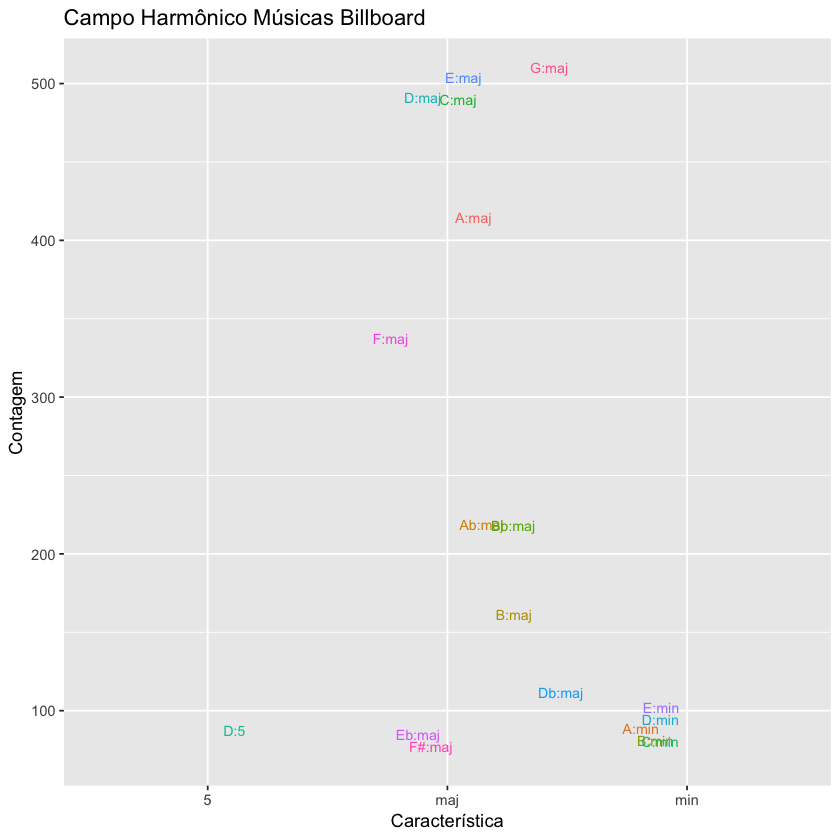

In [114]:
#Criando um gráfico com frequência dos Campos Harmônicos mais frequentemente utilizados.
#ggplot com label e cor por acorde.
ggplot(QualSub, aes(y= n, x = quality, label = chord, col = chord)) + 
#para fazer um gráfico de dispersão com texto, usamos o geom_text, escolhendo  como 'label' o texto que queremos plotar.
geom_text(aes(label = chord), hjust = 0, vjust = 0, size = 3, position = 'jitter' )+
# excluindo a legenda, para não poluir demais a visualização.
theme(legend.position = 'none') 
#adicionando título
+ ggtitle('Campo Harmônico Músicas Billboard') + 
#adicionando nomes dos eixos
xlab('Característica') + ylab('Contagem')


### Eu jamais imaginei uma lavada como essa dos campos maiores.

Aparentemente, para chegar à Billboard as músicas têm que ter um tom "feliz" nelas.

Vamos olhar um pouco mais em detalhe o root_roman, para entender quais as progressões mais comuns

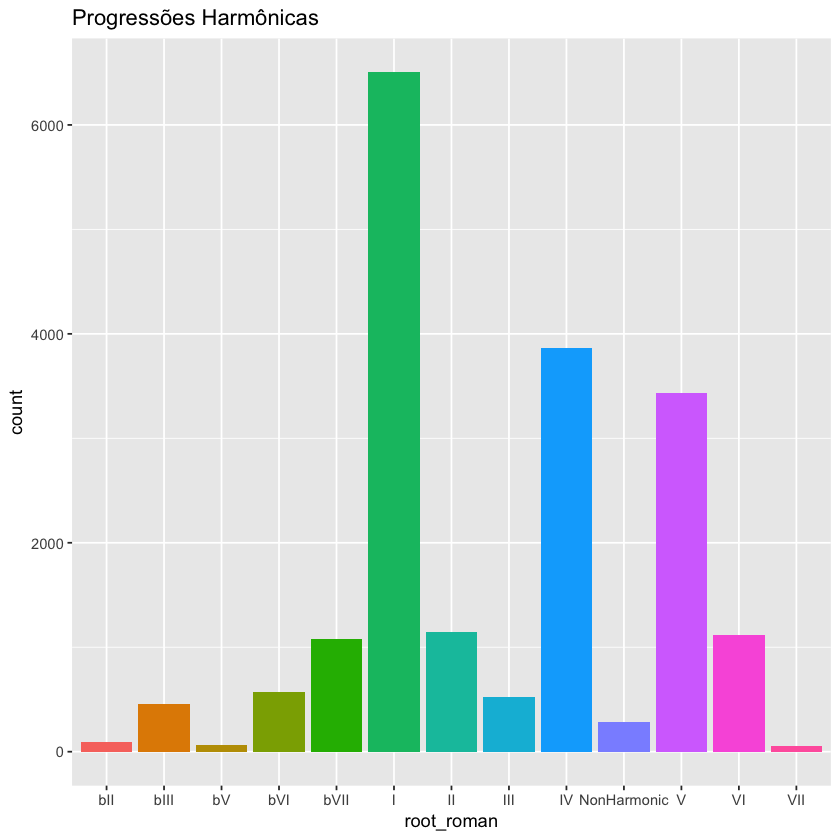

In [224]:
# Criando um gráfico de barras para as progressões harmônicas
ggplot(BillBoard, aes(root_roman,  fill = root_roman)) + 
geom_bar()+theme(legend.position = 'none')+ ggtitle('Progressões Harmônicas')
 

# Progressão Clássica: I - IV - V Blues e música popular.

Músicas populares são bem conhecidas por um padrão bem clássico de progressões, o I-IV-V.

Se pegarmos, por exemplo, uma música em Cmaj (Dó Maior), teremos: 

Dó Maior (I), Fá Maior (IV) e Sol Maior (V).

Se fosse em Emaj (Mi maior), seria: Mi maior(I) , Lá maior (IV) e Si maior(V).

O que vemos aqui é algo bastante interessante, pois já que sabemos os principais acordes-chave das músicas de sucesso; somando à progressão, é possível focar em como seria uma música "padrão" de sucesso na Billboard.


### Olhando os acordes mais comuns

Aqui vamos ver alguns dos acordes mais comuns, independente do grau.

In [129]:
#Criando um subset para visualização - Acordes usados pelo menos 100x no Dataset.
ChordSub <- subset(Quality, n > 100)

In [138]:
#Criando uma nova coluna com share de cada acorde no Dataset.
ChordSub <- ChordSub %>% mutate(share = n/sum(n),
         chord = reorder(chord,share))

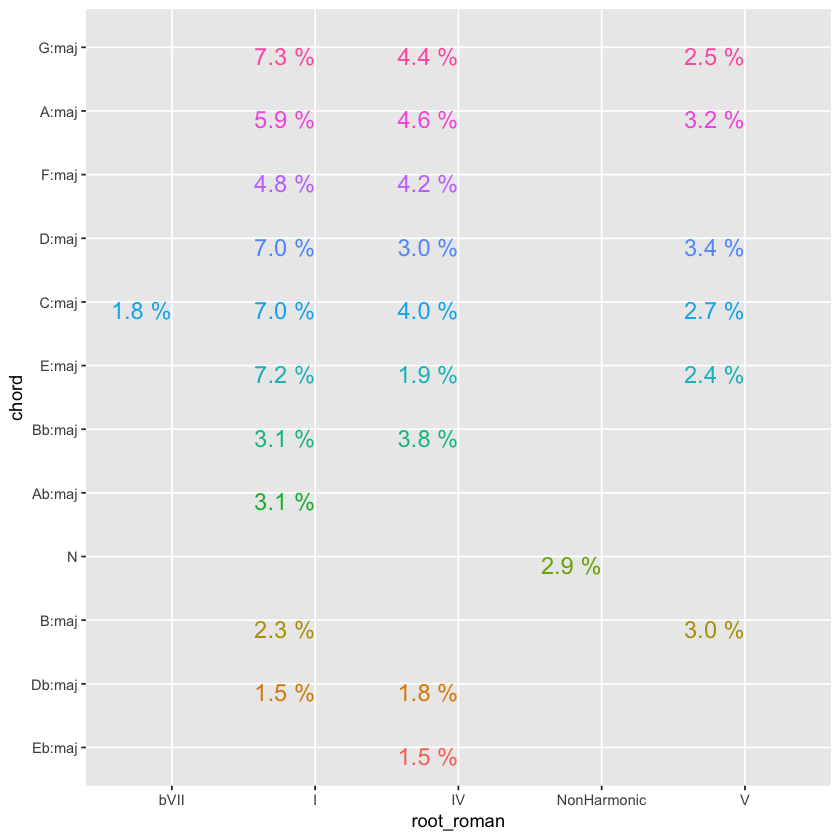

In [226]:
#Criando o gráfico para cada um dos acordes mais comuns e sua frequência.
ggplot(ChordSub, aes(root_roman, chord, col = chord, size= share)) +
geom_text(aes(label = sprintf("%.1f %%", 100*share)), hjust = 1, vjust = 1, size = 5)+
theme(legend.position = 'none')

## Muita gente diz que a música de sucesso foi ficando mais "burra". Será verdade?

O primeiro passo é determinar o que seria mais  "burra". 

Seriam harmonias menos elaboradas?

Bem, vejamos como é o uso das progressões ao longo dos anos.

Progressões mais elaboradas e diferentes da manjada I-IV-V, que já mencionei, devem indicar melodias mais incrementadas.

Caso a premissa de a música tornar-se mais burra ao longo do tempo for verdadeira, veremos variações entre a harmonia, havendo uma concentração crescente para temas mais simples.

In [213]:
Yearly <- BillBoard %>% 
count(year, quality, chord, root_roman, sort = TRUE)
head(Yearly)

year,quality,chord,root_roman,n
1983,maj,D:maj,I,52
1979,maj,E:maj,I,44
1959,maj,A:maj,I,40
1973,maj,Bb:maj,IV,39
1974,maj,B:maj,V,38
1985,maj,G:maj,IV,38


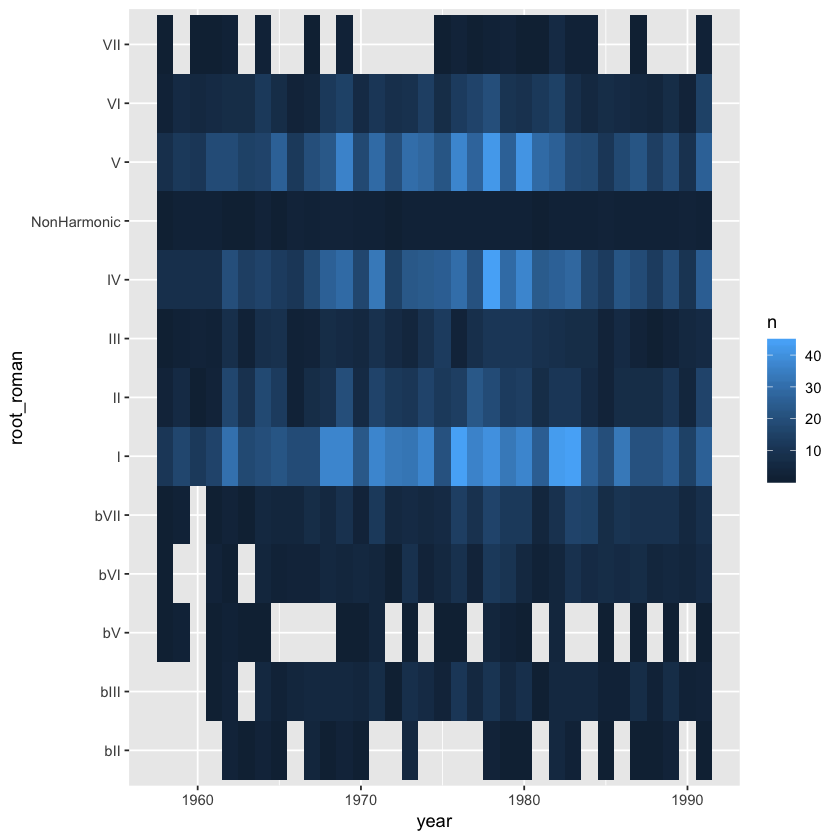

In [214]:
Yearly %>%
count(root_roman, year) %>%
ggplot(aes(x = year, y = root_roman))+
geom_tile(aes(fill=n))





### Observando o mapa de calor, não encontramos uma mudança visível de comportamento da harmonia. 

Ou seja, os sucessos seguem mais ou menos a mesma fórmula ao longo do tempo.

Até o começo dos anos 1960, entretanto, podemos verificar o que parece um indício de maior variedade.

### Verificando agora a quantidade de acordes usados em uma música.

E o primeiro passo é formular os acordes distintos utilizados em cada uma das músicas.

In [202]:
SongChords <- BillBoard %>% 
distinct(year, quality, chord, title, artist)
head(SongChords)

year,quality,chord,title,artist
1961,min,A:min,I Don't Mind,James Brown
1961,maj,C:maj,I Don't Mind,James Brown
1961,maj,F:maj,I Don't Mind,James Brown
1961,maj,D:maj,I Don't Mind,James Brown
1961,maj,G:maj,I Don't Mind,James Brown
1961,maj,A:maj,I Don't Mind,James Brown


In [206]:
Unique_Chords <- SongChords %>%
count(year,title, artist, sort = TRUE)

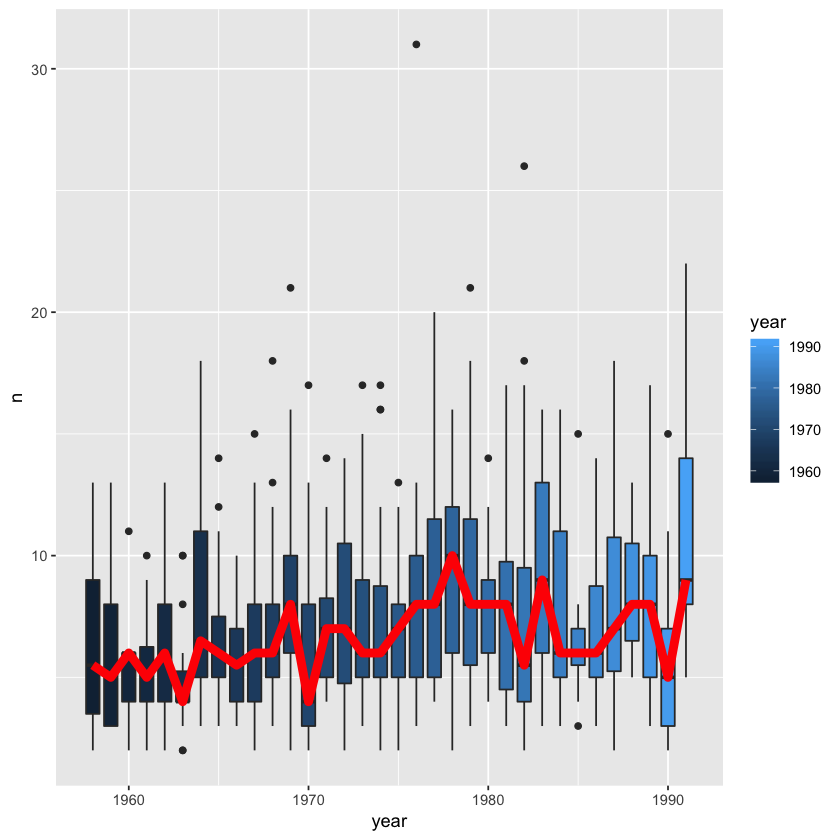

In [221]:
ggplot(Unique_Chords, aes(x= year, y = n, fill = year))+geom_boxplot(aes(group = year))+ 
stat_summary(fun.y = median, geom = 'line',  size = 2.5, col = 'red')

### Ao contrário do que os defensores de música colocam, a música não emburreceu. Pelo menos não até os anos 90.

Inclusive, podemos ver o efeito meio que contrário; músicas com cada vez mais acordes diferentes, o que 'floreia' mais as canções.

E para os anos 1990 em diante?

Para esse caso, não temos, infelizmente, um dataset confiável para analisarmos, o que é muito triste; afinal, eu gostaria de poder concluir algo a partir desses dados.


# O que concluir aqui?

Em primeiro lugar, foi possível verificar em quais campos harmônicos as músicas de sucesso se enquadram. 

Em segundo lugar, como os acordes são construídos nas músicas dado a progressão.

Ou seja, é possível até mesmo aplicar uma 'fórmula' para uma música popular.

Quanto à simplificação e emburrecimento da música, o que podemos concluir é que até o final dos anos desse dataset (1991), verificamos justamente o contrário; uma aparente evolução em complexidade, pelo menos em número de acordes.

E de 1991 adiante? Num olhar não estatístico, parece que esse efeito pode ser verdadeiro.

Ao mesmo tempo, quem pensaria que haveria uma dominância tão grande por campos harmônicos maiores em músicas famosas? Afinal de contas, músicas de amor nem sempre são felizes.